### This script contains the following
#### 1. Importing Libraries and Data
#### 2. Exploring relationships with correlations, scatterplots, pair plots, and categorical plots

# 01. Import libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Display chart in the notebook with out calling them

%matplotlib inline

# 02. Import data

In [3]:
#create path

path = r'C:\Users\marci\OneDrive\Desktop\Career Foundary\Netflix'

In [4]:
#Import data
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'global_countries_all.pkl'))

In [5]:
#View data
df.head()

,week_x,global_category,global_weekly_rank,show_title,weekly_hours_viewed,runtime,weekly_views,global_weeks_top_10,country_name,week_y,country_category,country_weekly_rank,country_weeks_top_10,_merge
0,2024-03-17,Films (English),1,Damsel,93200000,1.8333,50800000.0,2,Argentina,3/17/2024,Films,1,2,both
1,2024-03-17,Films (English),1,Damsel,93200000,1.8333,50800000.0,2,Argentina,3/10/2024,Films,1,1,both
2,2024-03-17,Films (English),1,Damsel,93200000,1.8333,50800000.0,2,Australia,3/17/2024,Films,1,2,both
3,2024-03-17,Films (English),1,Damsel,93200000,1.8333,50800000.0,2,Australia,3/10/2024,Films,1,1,both
4,2024-03-17,Films (English),1,Damsel,93200000,1.8333,50800000.0,2,Austria,3/17/2024,Films,1,2,both


In [6]:
#Check the shape
df.shape

(1838148, 14)

In [7]:
#View a list of the columns
df.columns

Index(['week_x', 'global_category', 'global_weekly_rank', 'show_title',
       'weekly_hours_viewed', 'runtime', 'weekly_views', 'global_weeks_top_10',
       'country_name', 'week_y', 'country_category', 'country_weekly_rank',
       'country_weeks_top_10', '_merge'],
      dtype='object')

In [8]:
#Dropping unneeded columns and creating a data subset
df_subset = df.drop(['week_x', 'week_y', '_merge', 'global_category', 'country_category', 'show_title', 'country_name'], axis = 1)

In [9]:
#check the subset to verify the columns were dropped
df_subset.head()

,global_weekly_rank,weekly_hours_viewed,runtime,weekly_views,global_weeks_top_10,country_weekly_rank,country_weeks_top_10
0,1,93200000,1.8333,50800000.0,2,1,2
1,1,93200000,1.8333,50800000.0,2,1,1
2,1,93200000,1.8333,50800000.0,2,1,2
3,1,93200000,1.8333,50800000.0,2,1,1
4,1,93200000,1.8333,50800000.0,2,1,2


# 03. Creating Matrix Heatmap

In [10]:
# Creating correlation table between variables
df_subset.corr()

,global_weekly_rank,weekly_hours_viewed,runtime,weekly_views,global_weeks_top_10,country_weekly_rank,country_weeks_top_10
global_weekly_rank,1.000000,-0.501879,0.058420,-0.593610,0.315747,0.074244,0.099235
weekly_hours_viewed,-0.501879,1.000000,0.297146,0.676097,-0.165738,-0.068366,-0.018670
runtime,0.058420,0.297146,1.000000,-0.177909,0.194532,-0.009087,0.042081
weekly_views,-0.593610,0.676097,-0.177909,1.000000,-0.335559,-0.153479,-0.051981
global_weeks_top_10,0.315747,-0.165738,0.194532,-0.335559,1.000000,-0.039702,0.205717
country_weekly_rank,0.074244,-0.068366,-0.009087,-0.153479,-0.039702,1.000000,0.124455
country_weeks_top_10,0.099235,-0.018670,0.042081,-0.051981,0.205717,0.124455,1.000000


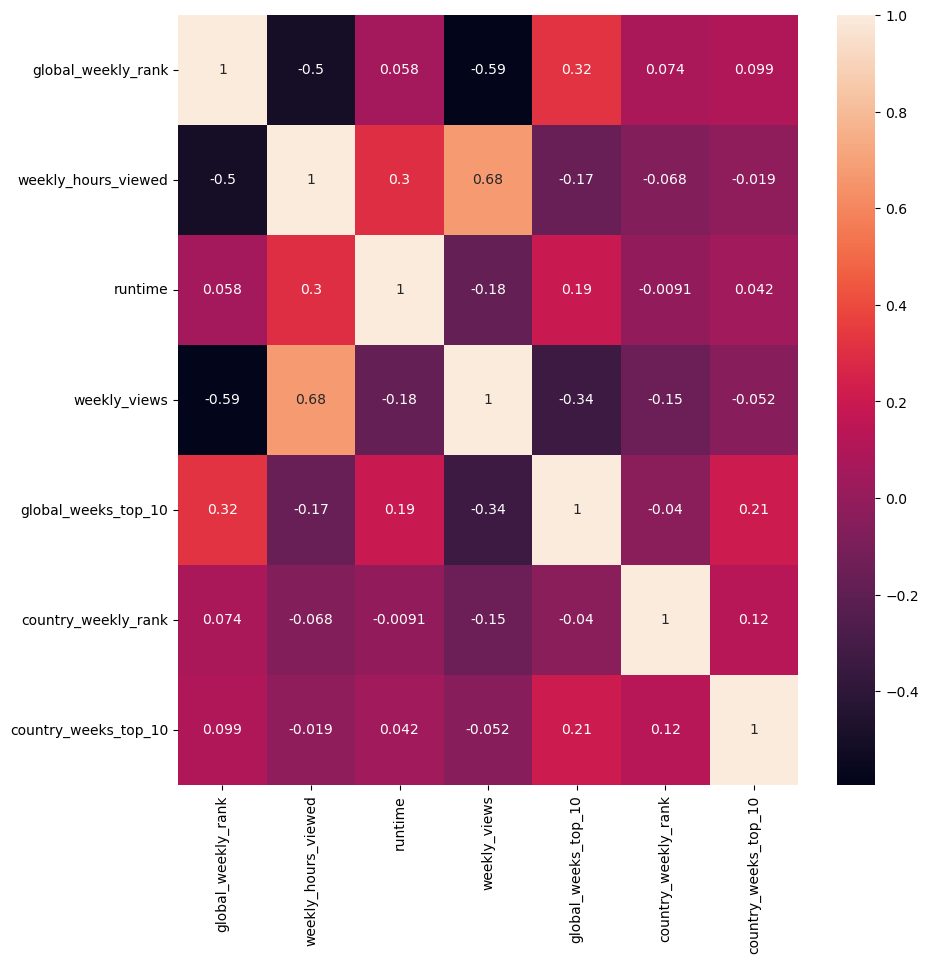

In [11]:
# Creating subplot using matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Creating matrix heatmap using seaborn
corr = sns.heatmap(df_subset.corr(), annot = True, ax = ax)

### Discussion

There is a strong correlation between the weekly hours viewed and the weekly rank, and weekly views and global weekly rank. The closer to 1 a variable is the stronger the correlation. 

# 04. Creating a Scatterplot

C:\Users\marci\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


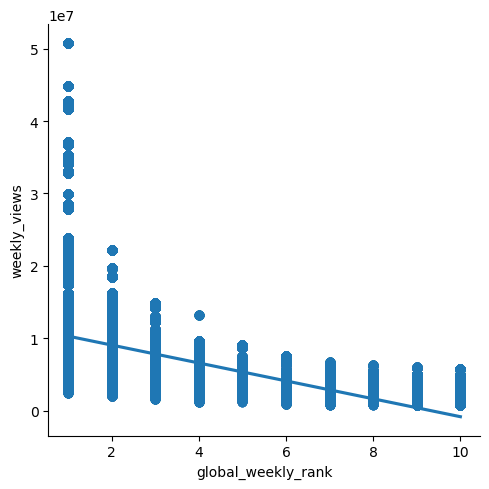

In [12]:
#scatterplot of the most correlated variables
#weekly views and global weekly rank scatterplot
sns.lmplot(x = 'global_weekly_rank', y = 'weekly_views', data = df)

### Discussion
The scatterplot shows a strong correlation between the weekly views and the global weeklky rank. The more views, the higher the rank.

C:\Users\marci\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


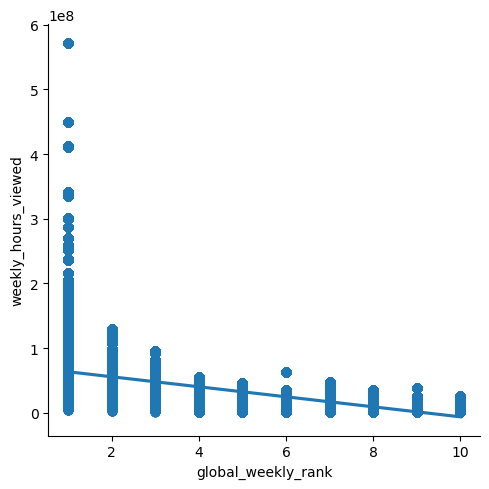

In [13]:
#weekly hours viewed and global weekly rank scatterplot
sns.lmplot(x = 'global_weekly_rank', y = 'weekly_hours_viewed', data = df)

### Discussion
There is a stong correlation between the weekly hours viewed and the global weekly rank. The more hours a film or show was viewed, the higher the rank.

# 05. Creating a Pair Plot

C:\Users\marci\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marci\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marci\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marci\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

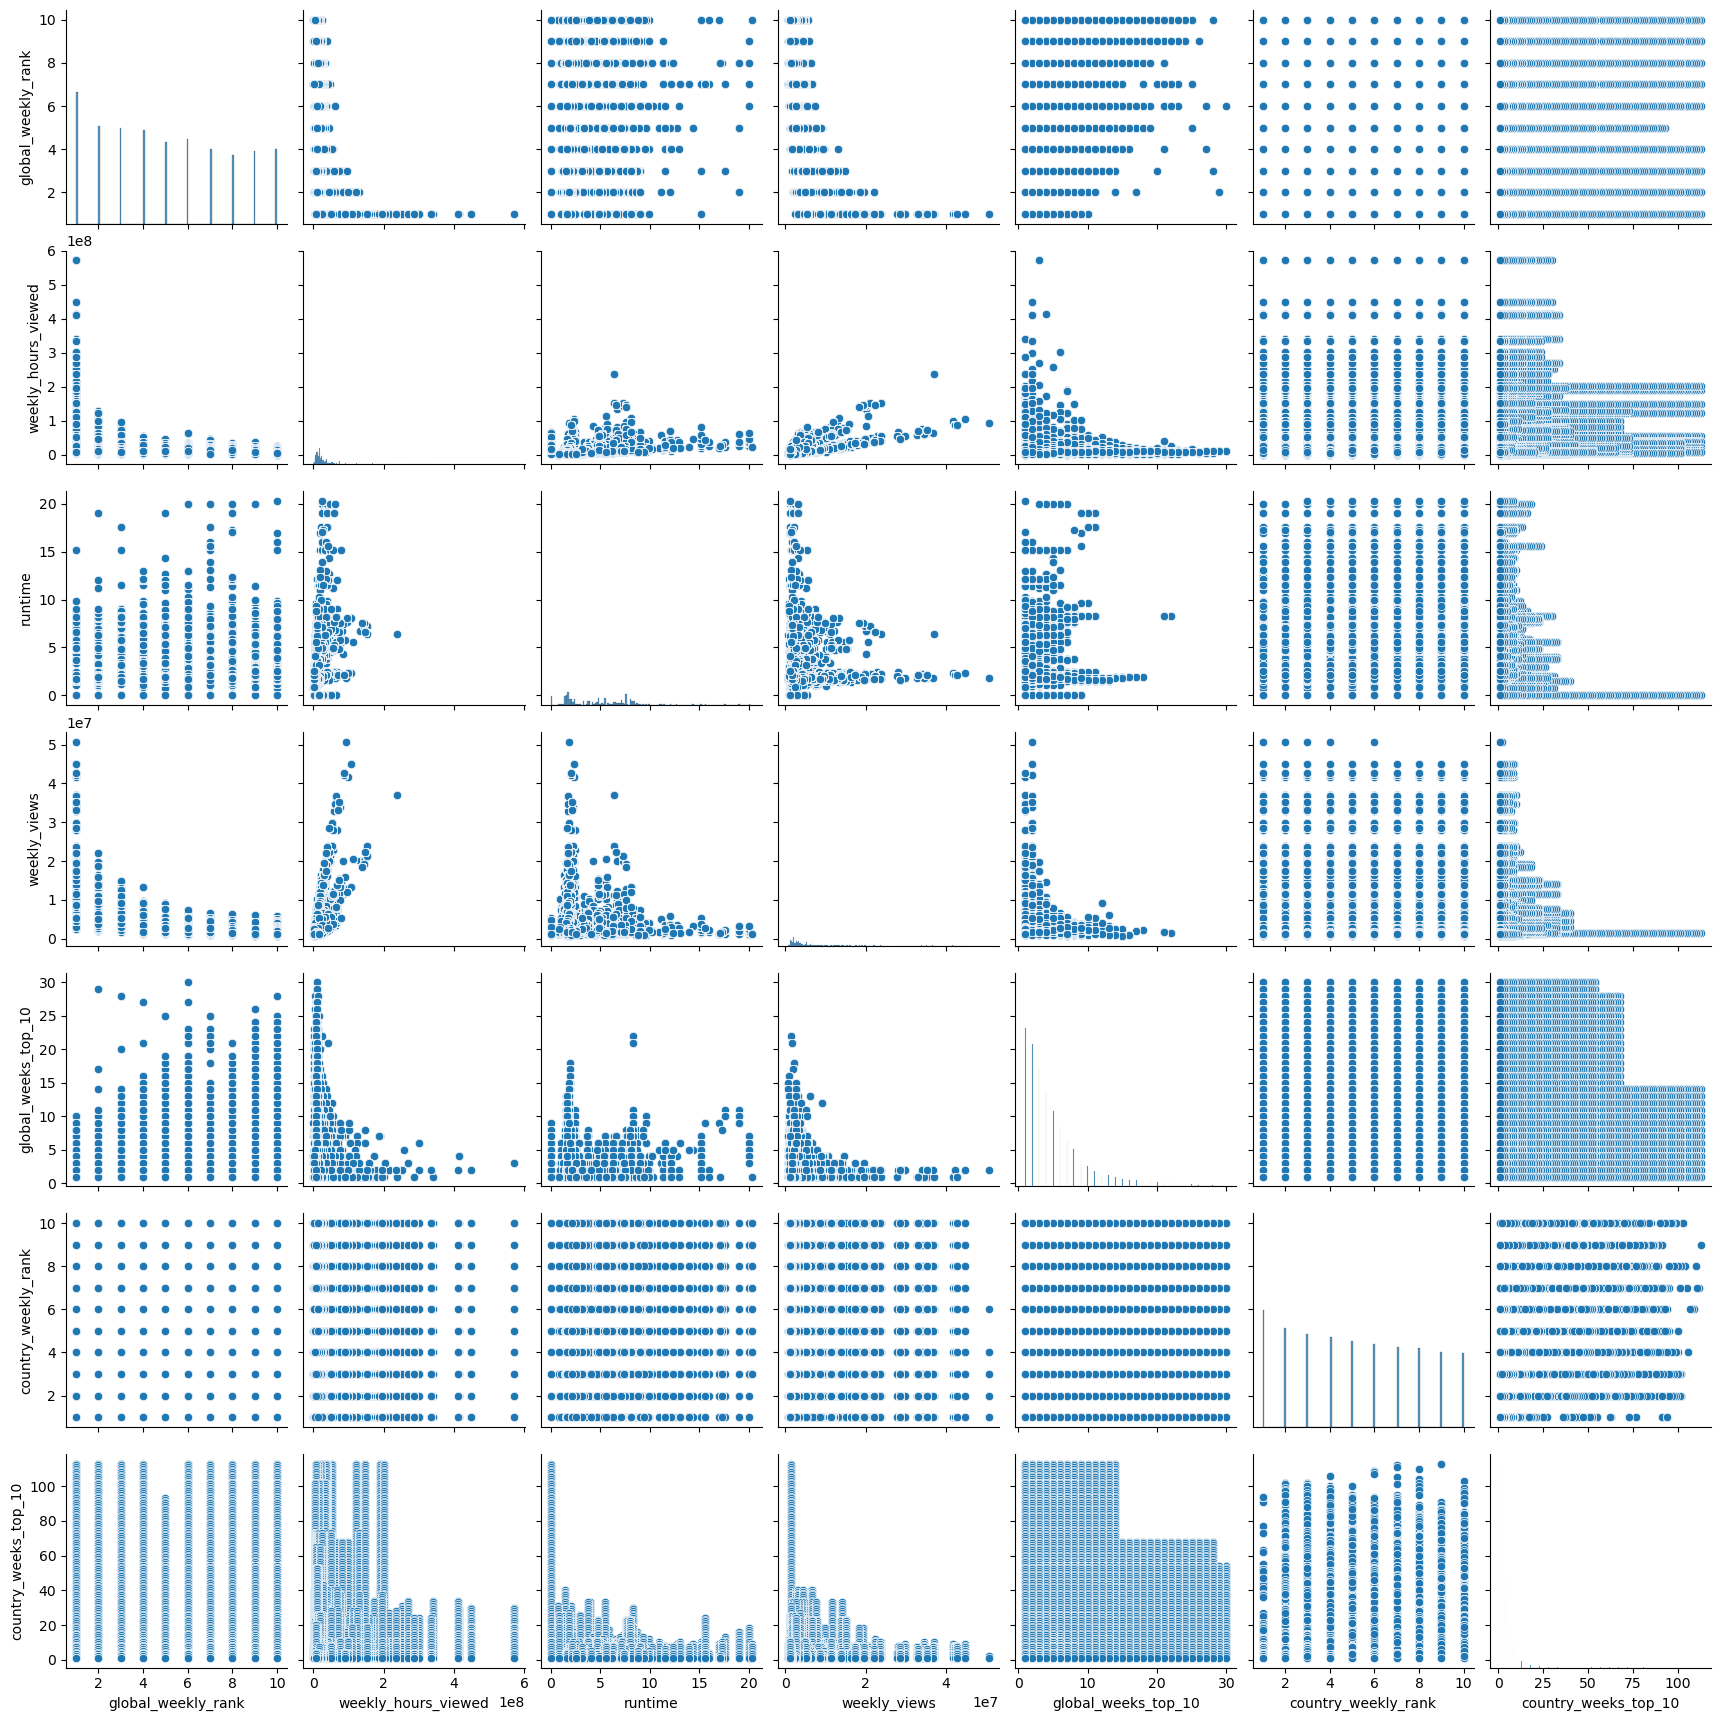

In [14]:
# Creating a pairplot
pair_plot = sns.pairplot(df_subset)

In [15]:
#Creating a subset for just global variables
df_subset_global = df.drop(['week_x', 'week_y', '_merge', 'global_category', 'country_weeks_top_10', 'country_weekly_rank', 'country_category', 'show_title', 'country_name'], axis = 1)

C:\Users\marci\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marci\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marci\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marci\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

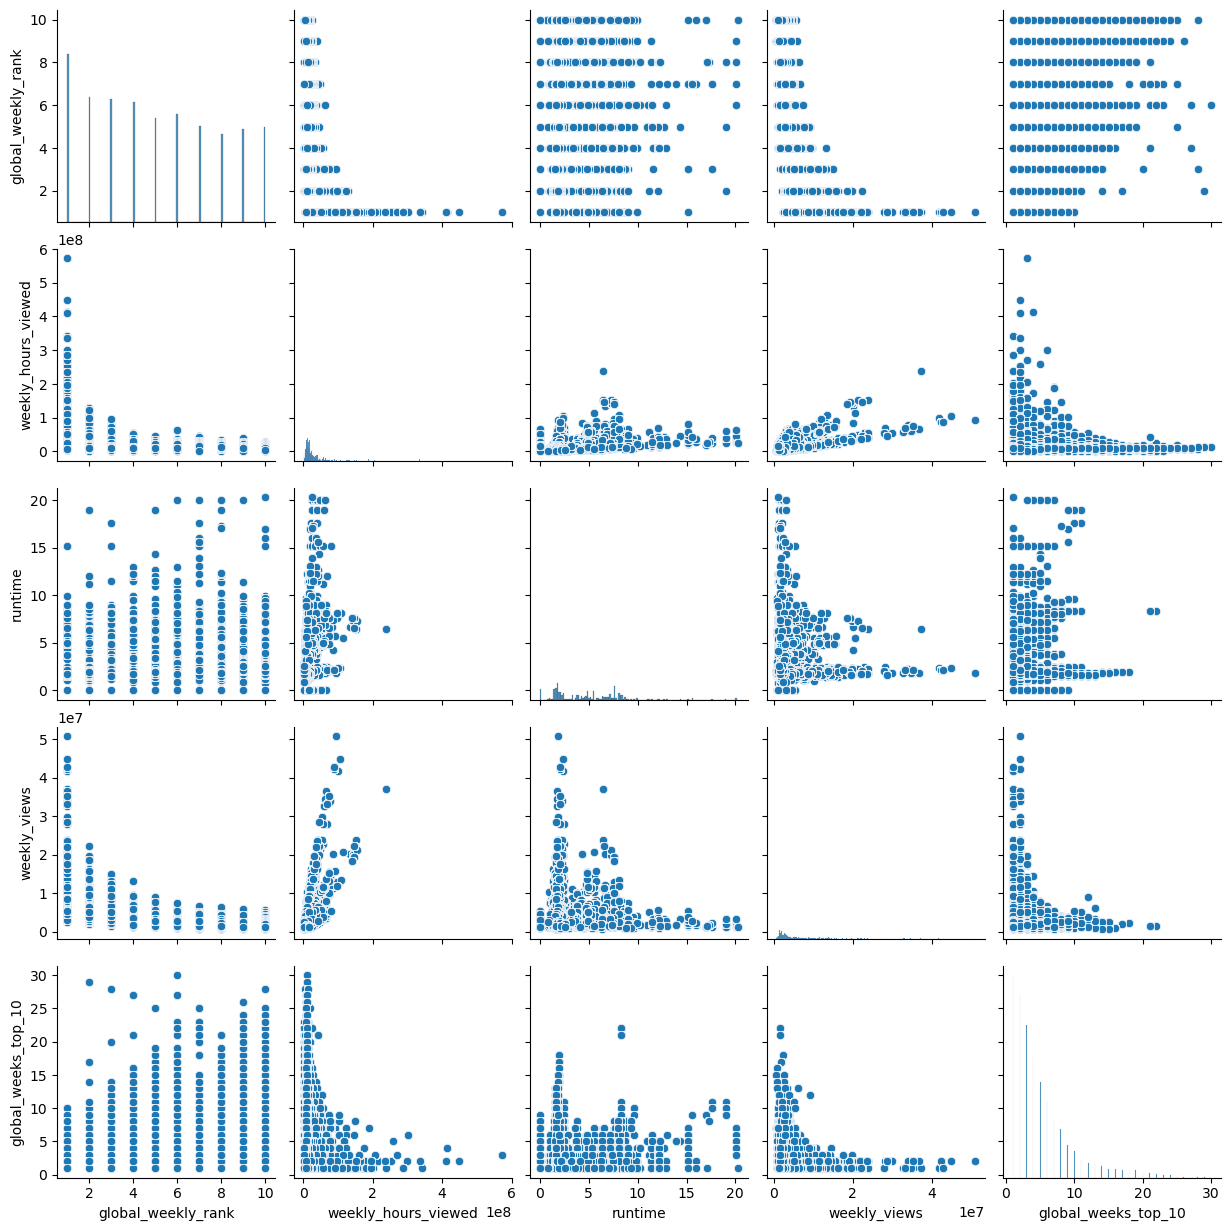

In [16]:
#creating a pairplot of the new subset
pair_plot_global = sns.pairplot(df_subset_global)

In [27]:
#Creating a subset of just country variables
df_subset_country = df.drop(['week_x', 'week_y', '_merge', 'global_category', 'country_category', 'show_title', 'country_name', 'global_weekly_rank', 'global_weeks_top_10'], axis = 1)

C:\Users\marci\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marci\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marci\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marci\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

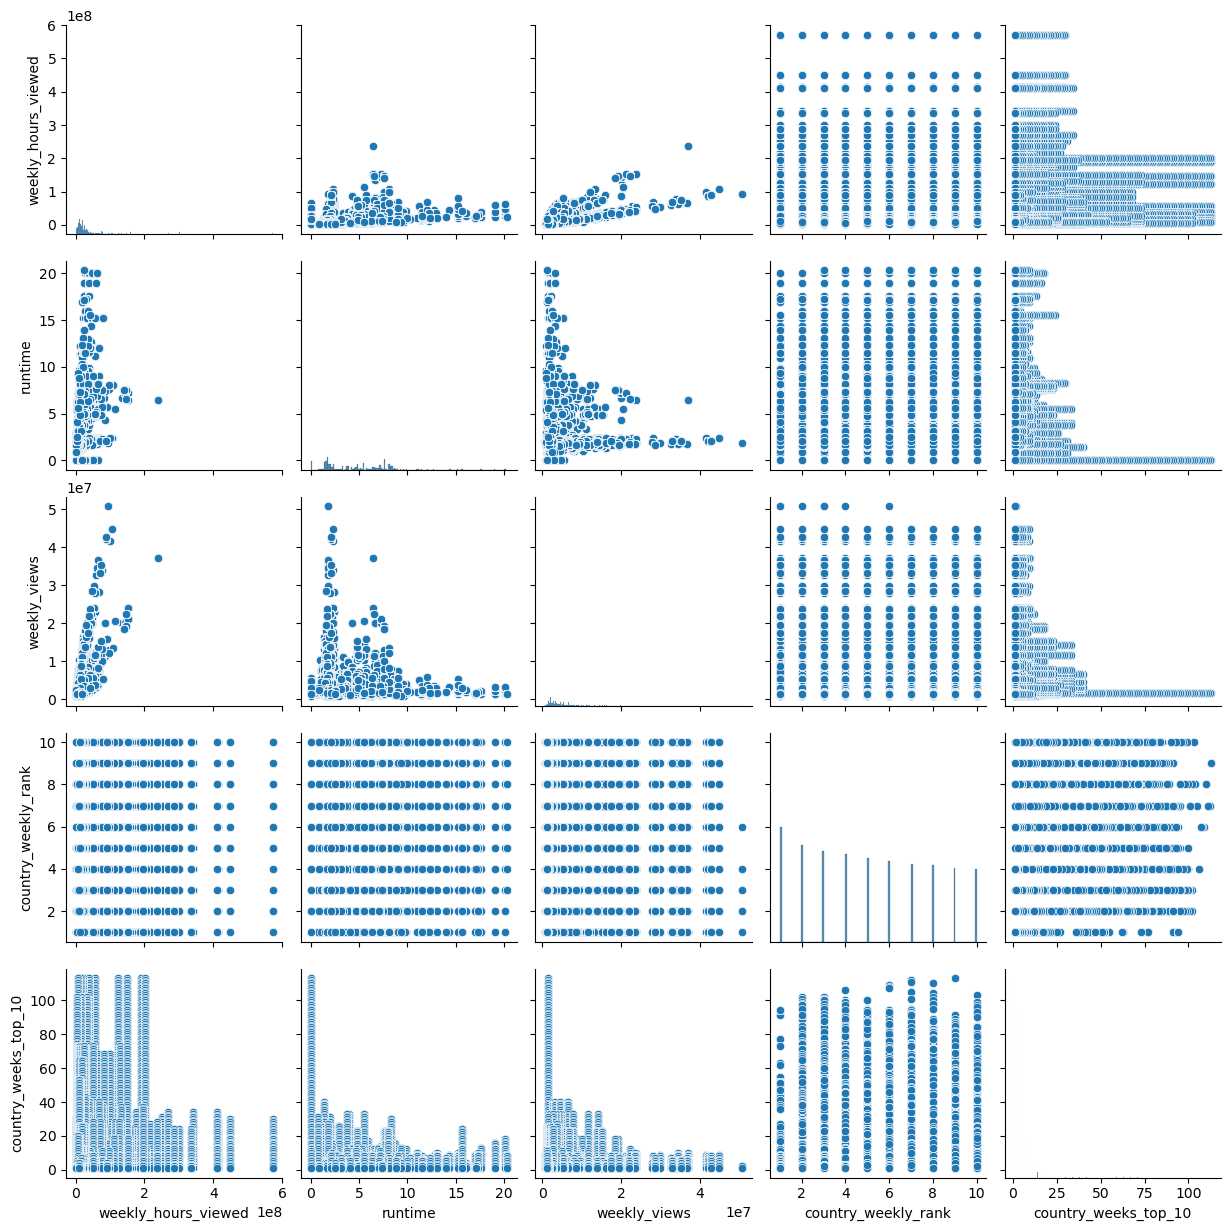

In [18]:
#creating a pairplot for the new subset
pair_plot_country = sns.pairplot(df_subset_country)

### Discussion
The pair plots looked about like I expected. I expected to see a correlation between number of views/ hours viewd and the country and global rankings. I would like to explore the different regions of the world to see if that also has an impact on the different titles rankings. However, this will need to be done with a different type of visualization. 

# 06. Creating a Categorical Plot

C:\Users\marci\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='weekly_hours_viewed', ylabel='Count'>

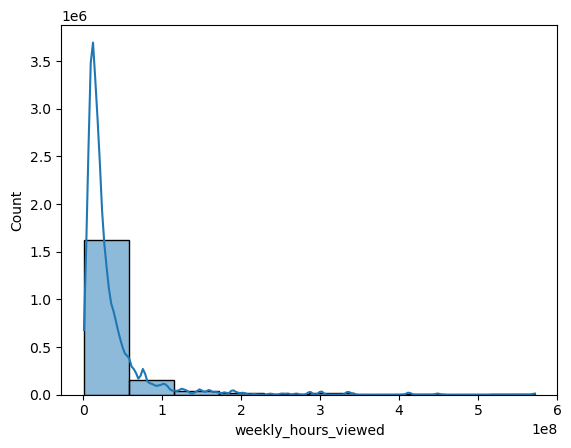

In [19]:
# Creating a histogram to see distribution
sns.histplot(df['weekly_hours_viewed'], bins = 10, kde = True)

C:\Users\marci\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='runtime', ylabel='Count'>

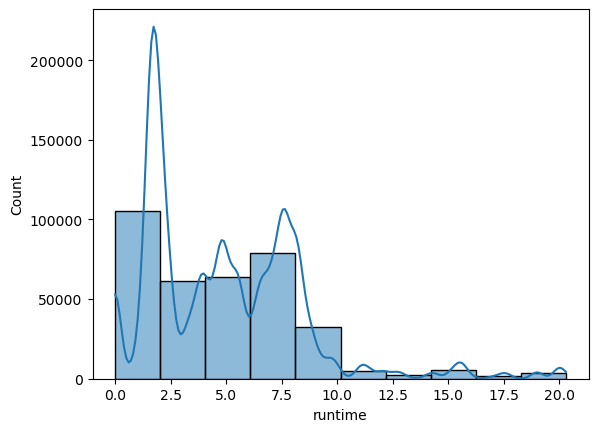

In [20]:
sns.histplot(df['runtime'], bins = 10, kde = True)

In [21]:
# Creating score category for categorical plot
df.loc[df['runtime'] < 6 , 'Runtime Category'] = 'Runtime low'
df.loc[(df['runtime'] >= 6) & (df['runtime'] < 15), 'Runtime Category'] = 'Runtime Medium'
df.loc[df['runtime'] >= 15, 'Runtime Category'] = 'Runtime High'

In [22]:
#view the values of each category created
df['Runtime Category'].value_counts(dropna = False)

Runtime Category
nan               1478102
Runtime low        229602
Runtime Medium     120655
Runtime High         9789
Name: count, dtype: int64

C:\Users\marci\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marci\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marci\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\marci\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


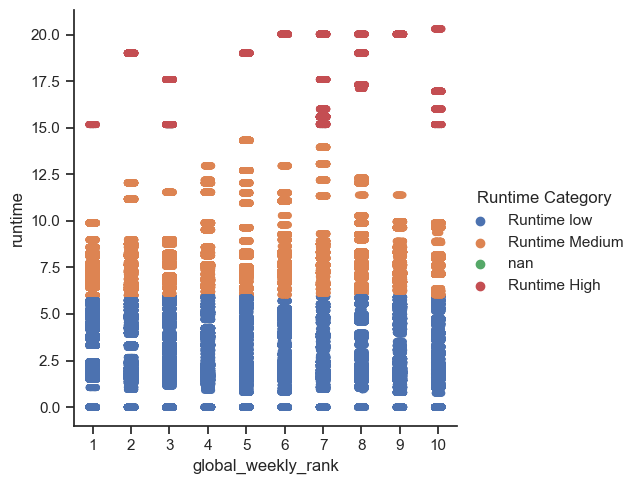

In [23]:
#Create a categorical plot in seaborn using the categories created above
sns.set(style="ticks")
g = sns.catplot(x= 'global_weekly_rank', y= 'runtime', hue= 'Runtime Category', data=df) 

C:\Users\marci\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marci\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marci\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


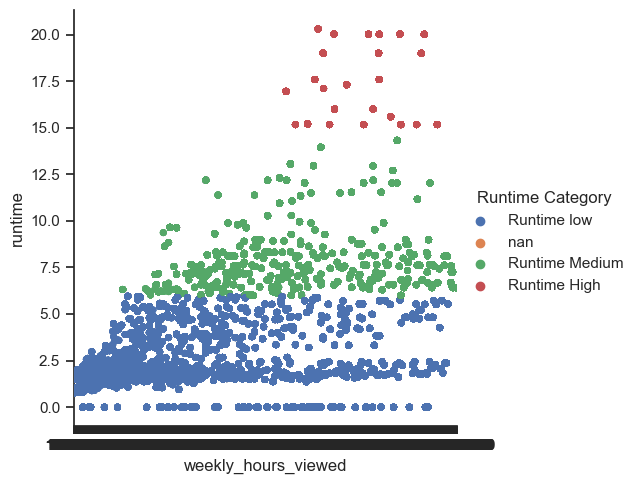

In [24]:
sns.set(style="ticks")
g2 = sns.catplot(x= 'weekly_hours_viewed', y= 'runtime', hue= 'Runtime Category', data=df) 

C:\Users\marci\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marci\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marci\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


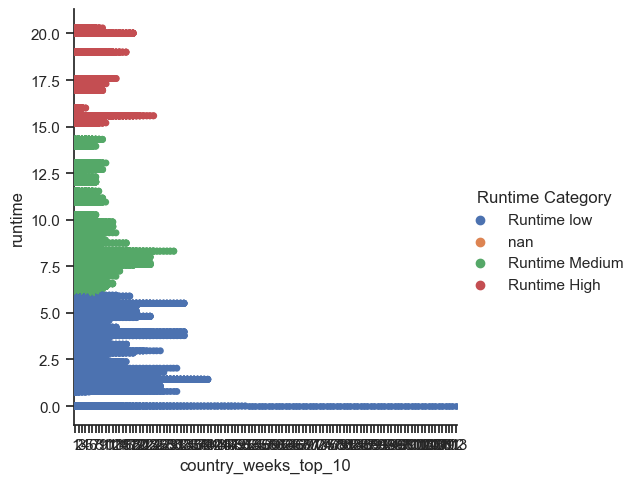

In [25]:
sns.set(style="ticks")
g3 = sns.catplot(x= 'country_weeks_top_10', y= 'runtime', hue= 'Runtime Category', data=df) 

C:\Users\marci\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marci\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\marci\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


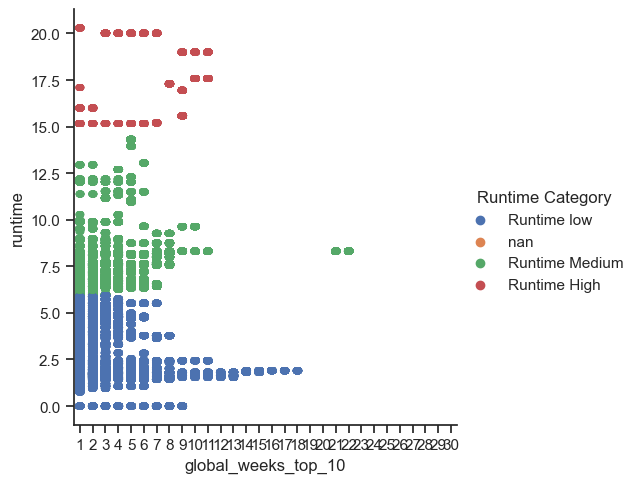

In [26]:
sns.set(style="ticks")
g4 = sns.catplot(x= 'global_weeks_top_10', y= 'runtime', hue= 'Runtime Category', data=df) 

### Discussion
I created categorical plots for a few different variables to see how the runtime impacted them differently. I was interested to see the distribution of how the runtime impacted the weekly ranking for the different titles. I expected the lower runtimes shows to have more plots and the higher to have fewer, which was correct. I was surprised to see there were some shows in the runtime low category that were in the top 10 for a longer period of time. 

### Q7 & 8. 
Most of the questions I asked for my analysis deal with which titles are in the top 10, for how long, and where each title is the most popular. The metrics in this portion of my analysis answer the question of how runtime impacts popularity and how global and weekly top 10 is impacted by the hours viewed as well as runtime. 
